## Ex1: Participant Exercise

1. Download the daily stock price of four or five randomly selected stocks. The stocks can belong to one sector.

2. Find out the value at risk (Var) of each stock at 95%.

3. Plot the daily gain or loss of all the stocks in one plot.

4. Find out the probability of making 4% gain in each of the stock.


In [1]:
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
al_df = pd.read_csv('https://raw.githubusercontent.com/roysohan/MLCourse/main/session1/ashokleyland.csv', parse_dates=['Date'])
al_df = al_df.set_index(['Date'], drop=True)
al_df.sort_index(ascending =  True, inplace = True)
al_df = al_df[['Close Price','Open Price']]
al_df["gain"] = ((al_df['Close Price']- al_df['Open Price'])*100/al_df['Open Price'])
al_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-10,154.25,158.00,-2.373418
2022-10-11,149.20,154.00,-3.116883
2022-10-12,149.05,149.95,-0.600200
2022-10-13,147.15,149.05,-1.274740
2022-10-14,147.95,151.00,-2.019868


In [6]:
ap_df = pd.read_csv('https://raw.githubusercontent.com/roysohan/MLCourse/main/session1/asianpaints.csv', parse_dates=['Date'])
ap_df = ap_df.set_index(['Date'], drop=True)
ap_df.sort_index(ascending =  True, inplace = True)
ap_df = ap_df[['Close Price','Open Price']]
ap_df["gain"] = ((ap_df['Close Price']- ap_df['Open Price'])*100/ap_df['Open Price'])
ap_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-10,3278.20,3260.20,0.552113
2022-10-11,3300.35,3285.05,0.465746
2022-10-12,3247.60,3319.00,-2.151250
2022-10-13,3211.25,3243.00,-0.979032
2022-10-14,3185.60,3240.00,-1.679012


In [7]:
ho_df = pd.read_csv('https://raw.githubusercontent.com/roysohan/MLCourse/main/session1/hindalco.csv', parse_dates=['Date'])
ho_df = ho_df.set_index(['Date'], drop=True)
ho_df.sort_index(ascending =  True, inplace = True)
ho_df = ho_df[['Close Price','Open Price']]
ho_df["gain"] = ((ho_df['Close Price']- ho_df['Open Price'])*100/ho_df['Open Price'])
ho_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-10,407.40,401.15,1.558021
2022-10-11,396.30,403.50,-1.784387
2022-10-12,399.95,397.05,0.730387
2022-10-13,401.60,410.55,-2.180002
2022-10-14,397.25,410.15,-3.145191


In [8]:
tm_df = pd.read_csv('https://raw.githubusercontent.com/roysohan/MLCourse/main/session1/tatamotors.csv', parse_dates=['Date'])
tm_df = tm_df.set_index(['Date'], drop=True)
tm_df.sort_index(ascending =  True, inplace = True)
tm_df = tm_df[['Close Price','Open Price']]
tm_df["gain"] = ((tm_df['Close Price']- tm_df['Open Price'])*100/tm_df['Open Price'])
tm_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-10,395.95,403.10,-1.773753
2022-10-11,393.30,396.95,-0.919511
2022-10-12,396.50,395.00,0.379747
2022-10-13,398.95,396.00,0.744949
2022-10-14,396.20,405.15,-2.209058


In [9]:
ts_df = pd.read_csv('https://raw.githubusercontent.com/roysohan/MLCourse/main/session1/tatasteel.csv', parse_dates=['Date'])
ts_df = ts_df.set_index(['Date'], drop=True)
ts_df.sort_index(ascending =  True, inplace = True)
ts_df = ts_df[['Close Price','Open Price']]
ts_df["gain"] = ((ts_df['Close Price']- ts_df['Open Price'])*100/ts_df['Open Price'])
ts_df.head(5)

,Close Price,Open Price,gain
Date,,,
2022-10-10,103.25,102.0,1.225490
2022-10-11,100.30,103.3,-2.904163
2022-10-12,100.55,100.5,0.049751
2022-10-13,100.10,100.7,-0.595829
2022-10-14,100.10,101.6,-1.476378


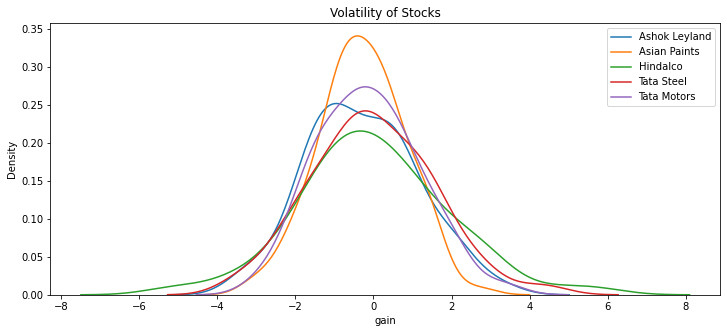

In [11]:
plt.figure(figsize = (12, 5))
sn.kdeplot(al_df.gain, label = 'Ashok Leyland')
sn.kdeplot(ap_df.gain, label = 'Asian Paints')
sn.kdeplot(ho_df.gain, label = 'Hindalco')
sn.kdeplot(ts_df.gain, label = 'Tata Steel')
sn.kdeplot(tm_df.gain, label = 'Tata Motors')
plt.title("Volatility of Stocks")
plt.legend()

In [13]:
from scipy import stats

In [16]:
al_ci_90 = stats.norm.interval(0.90, loc = al_df.gain.mean(), scale = al_df.gain.std())
al_ci_90


(-2.6276160828504773, 2.0381993529090607)

In [17]:
al_df[al_df.gain<al_ci_90[0]]

,Close Price,Open Price,gain
Date,,,
2022-10-11,149.20,154.00,-3.116883
2022-11-01,149.70,154.70,-3.232062
2023-01-30,144.25,149.40,-3.447122
2023-02-07,149.45,153.95,-2.923027
2023-03-13,140.90,145.20,-2.961433


In [18]:
ap_ci_90 = stats.norm.interval(0.90, loc = ap_df.gain.mean(), scale = ap_df.gain.std())
ap_ci_90

(-2.0947597737381614, 1.516059952410545)

In [19]:
ap_df[ap_df.gain<ap_ci_90[0]]

,Close Price,Open Price,gain
Date,,,
2022-10-12,3247.60,3319.00,-2.151250
2022-10-27,3044.60,3110.00,-2.102894
2022-11-07,3105.55,3180.85,-2.367292
2023-01-19,2868.05,2957.00,-3.008116
2023-01-20,2788.10,2850.10,-2.175362
2023-02-02,2705.85,2773.65,-2.444432
2023-02-23,2706.35,2791.00,-3.032963


In [20]:
ho_ci_90 = stats.norm.interval(0.90, loc = ho_df.gain.mean(), scale = ho_df.gain.std())
ho_ci_90

(-3.1742361919848987, 3.1673193013940666)

In [21]:
ho_df[ho_df.gain<ho_ci_90[0]]

,Close Price,Open Price,gain
Date,,,
2022-11-09,417.00,432.60,-3.606103
2022-12-23,430.05,452.05,-4.866718
2023-01-04,461.30,477.85,-3.463430
2023-02-24,415.20,438.10,-5.227117
2023-02-28,399.20,414.70,-3.737642


In [22]:
tm_ci_90 = stats.norm.interval(0.90, loc = tm_df.gain.mean(), scale = tm_df.gain.std())
tm_ci_90

(-2.301128084172258, 2.013742727716304)

In [23]:
tm_df[tm_df.gain<tm_ci_90[0]]

,Close Price,Open Price,gain
Date,,,
2022-12-23,378.30,390.00,-3.000000
2023-01-04,385.75,395.15,-2.378843
2023-03-13,422.40,435.00,-2.896552


In [24]:
ts_ci_90 = stats.norm.interval(0.90, loc = ts_df.gain.mean(), scale = ts_df.gain.std())
ts_ci_90

(-2.6139236119086195, 2.5473935691486718)

In [25]:
ts_df[ts_df.gain<ts_ci_90[0]]

,Close Price,Open Price,gain
Date,,,
2022-10-11,100.3,103.3,-2.904163
2022-11-21,104.2,107.9,-3.429101
2022-12-23,102.2,105.8,-3.402647
2023-02-27,106.1,109.8,-3.369763


In [26]:
invest_amt = 100000
al_var = invest_amt * al_ci_90[0]/100
ap_var = invest_amt * ap_ci_90[0]/100
ho_var = invest_amt * ho_ci_90[0]/100
ts_var = invest_amt * ts_ci_90[0]/100
tm_var = invest_amt * tm_ci_90[0]/100

In [27]:
al_var

-2627.6160828504776

In [28]:
ap_var

-2094.759773738161

In [29]:
ho_var

-3174.2361919848986

In [30]:
ts_var

-2613.9236119086195

In [31]:
tm_var

-2301.128084172258

In [32]:
1- stats.norm.cdf(4.0, loc = al_df.gain.mean(), scale = al_df.gain.std())

0.0012306773387140701

In [33]:
1- stats.norm.cdf(4.0, loc = ap_df.gain.mean(), scale = ap_df.gain.std())

4.655181276258524e-05

In [34]:
1- stats.norm.cdf(4.0, loc = ho_df.gain.mean(), scale = ho_df.gain.std())

0.018909546361943752

In [35]:
1- stats.norm.cdf(4.0, loc = ts_df.gain.mean(), scale = ts_df.gain.std())

0.005074481029716527

In [36]:
1- stats.norm.cdf(4.0, loc = tm_df.gain.mean(), scale = tm_df.gain.std())

0.0007910169357752128